<a href="https://colab.research.google.com/github/wenyenyeh/HW4-2_-PyCaret-/blob/main/HW4_2%EF%BC%9A%E4%BD%BF%E7%94%A8_PyCaret%E6%96%B9%E6%B3%95%E9%80%B2%E8%A1%8C%E6%A8%A1%E5%9E%8B%E5%84%AA%E5%8C%96.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pycaret kaggle


In [4]:
# 上傳你的 kaggle.json 憑證文件（從 Kaggle 網站下載）
from google.colab import files
files.upload()

# 設置 Kaggle 配置
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content"

# 使用 Kaggle API 下載 Titanic 數據集
!kaggle competitions download -c titanic

# 解壓數據集
!unzip titanic.zip


Saving test.csv to test (1).csv
Saving train.csv to train (1).csv
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 7, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 407, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /content. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/
unzip:  cannot find or open titanic.zip, titanic.zip.zip or titanic.zip.ZIP.


In [5]:
import pandas as pd

# 加載數據
data = pd.read_csv('train.csv')

# 檢查數據結構
data.info()

# 查看數據前幾行
data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
from pycaret.classification import *

# 配置 PyCaret 環境
clf = setup(
    data=data,
    target='Survived',  # 目標變量
    session_id=123,     # 隨機種子
    normalize=True,     # 標準化數據
    feature_selection=True,  # 自動特徵選擇
    remove_multicollinearity=True,  # 移除多重共線性
    transformation=True  # 數據變換
)



[LightGBM] [Info] Number of positive: 239, number of negative: 384
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001205 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 419
[LightGBM] [Info] Number of data points in the train set: 623, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383628 -> initscore=-0.474179
[LightGBM] [Info] Start training from score -0.474179
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

,Description,Value
0,Session id,123
1,Target,Survived
2,Target type,Binary
3,Original data shape,"(891, 12)"
4,Transformed data shape,"(891, 3)"
5,Transformed train set shape,"(623, 3)"
6,Transformed test set shape,"(268, 3)"
7,Numeric features,6
8,Categorical features,5
9,Rows with missing values,79.5%


In [9]:
# 比較多種分類模型的性能
best_models = compare_models(n_select=5)  # 選擇表現最好的 5 個模型

# 查看最佳模型列表
print(best_models)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.6164,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.2180
dummy,Dummy Classifier,0.6164,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1870
svm,SVM - Linear Kernel,0.4764,0.4997,0.5833,0.3818,0.4402,-0.0052,-0.0052,0.1890
qda,Quadratic Discriminant Analysis,0.4320,0.5000,0.8000,0.3078,0.4446,0.0000,0.0000,0.2790
lr,Logistic Regression,0.3836,0.4147,1.0000,0.3836,0.5545,0.0000,0.0000,0.7960
knn,K Neighbors Classifier,0.3836,0.5000,1.0000,0.3836,0.5545,0.0000,0.0000,0.3170
nb,Naive Bayes,0.3836,0.5000,1.0000,0.3836,0.5545,0.0000,0.0000,0.1910
dt,Decision Tree Classifier,0.3836,0.5000,1.0000,0.3836,0.5545,0.0000,0.0000,0.1940
ridge,Ridge Classifier,0.3836,0.4147,1.0000,0.3836,0.5545,0.0000,0.0000,0.1930
rf,Random Forest Classifier,0.3836,0.4574,1.0000,0.3836,0.5545,0.0000,0.0000,0.6160


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

[XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='cpu', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, objective='binary:logistic', ...), DummyClassifier(constant=None, random_state=123, strategy='prior'), SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.001, fit_intercept=True,
              l1

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6190,0.5433,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.6190,0.4177,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.6190,0.5919,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.6290,0.4119,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.6129,0.4216,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.6129,0.4742,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.6129,0.3816,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.6129,0.5197,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.6129,0.3410,0.0000,0.0000,0.0000,0.0000,0.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).
XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='cpu', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, objective='binary:logistic', ...)


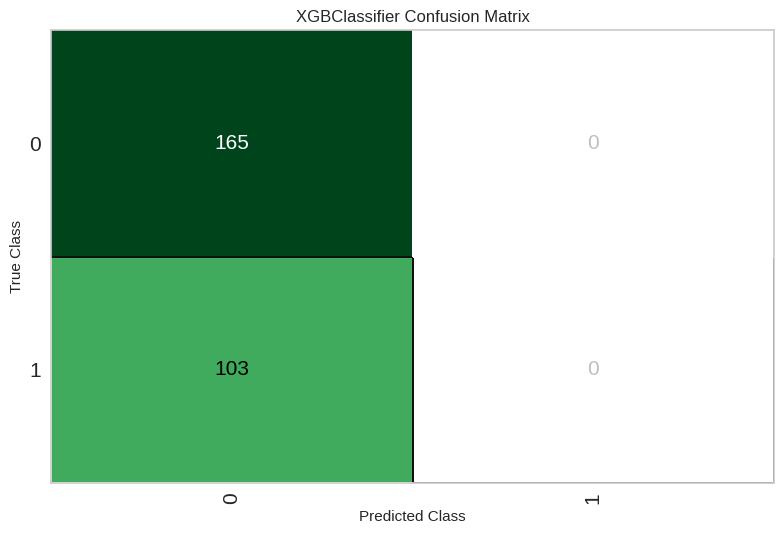

In [10]:
# 對第一個最佳模型進行超參數調優
tuned_model = tune_model(best_models[0])

# 查看調優後的模型
print(tuned_model)

# 評估調優後模型的性能
plot_model(tuned_model, plot='confusion_matrix')  # 混淆矩陣


In [11]:
# 固化最佳模型
final_model = finalize_model(tuned_model)

# 測試數據預測
test_data = pd.read_csv('test.csv')
predictions = predict_model(final_model, data=test_data)

# 查看預測結果
predictions.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,prediction_label,prediction_score
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,0.9983
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0.9983
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,0.9983
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0.9983
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,0.9983


In [12]:
# 保存最終模型
save_model(final_model, 'titanic_best_model')

# 提供下載鏈接
from google.colab import files
files.download('titanic_best_model.pkl')


Transformation Pipeline and Model Successfully Saved


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>